/home/hp/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hp/miniconda3/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


Processing mutation: A74G
  Loading reference structure from /home/hp/results/MOUSE/level2/A74G/minim/minim.pdb


/home/hp/miniconda3/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


  Processing /home/hp/results/MOUSE/level2/A74G/traj00/fep_000_1.000.dcd


/home/hp/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj01/fep_000_1.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj02/fep_000_1.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj03/fep_000_1.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj04/fep_000_1.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj05/fep_000_1.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj06/fep_000_1.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/r

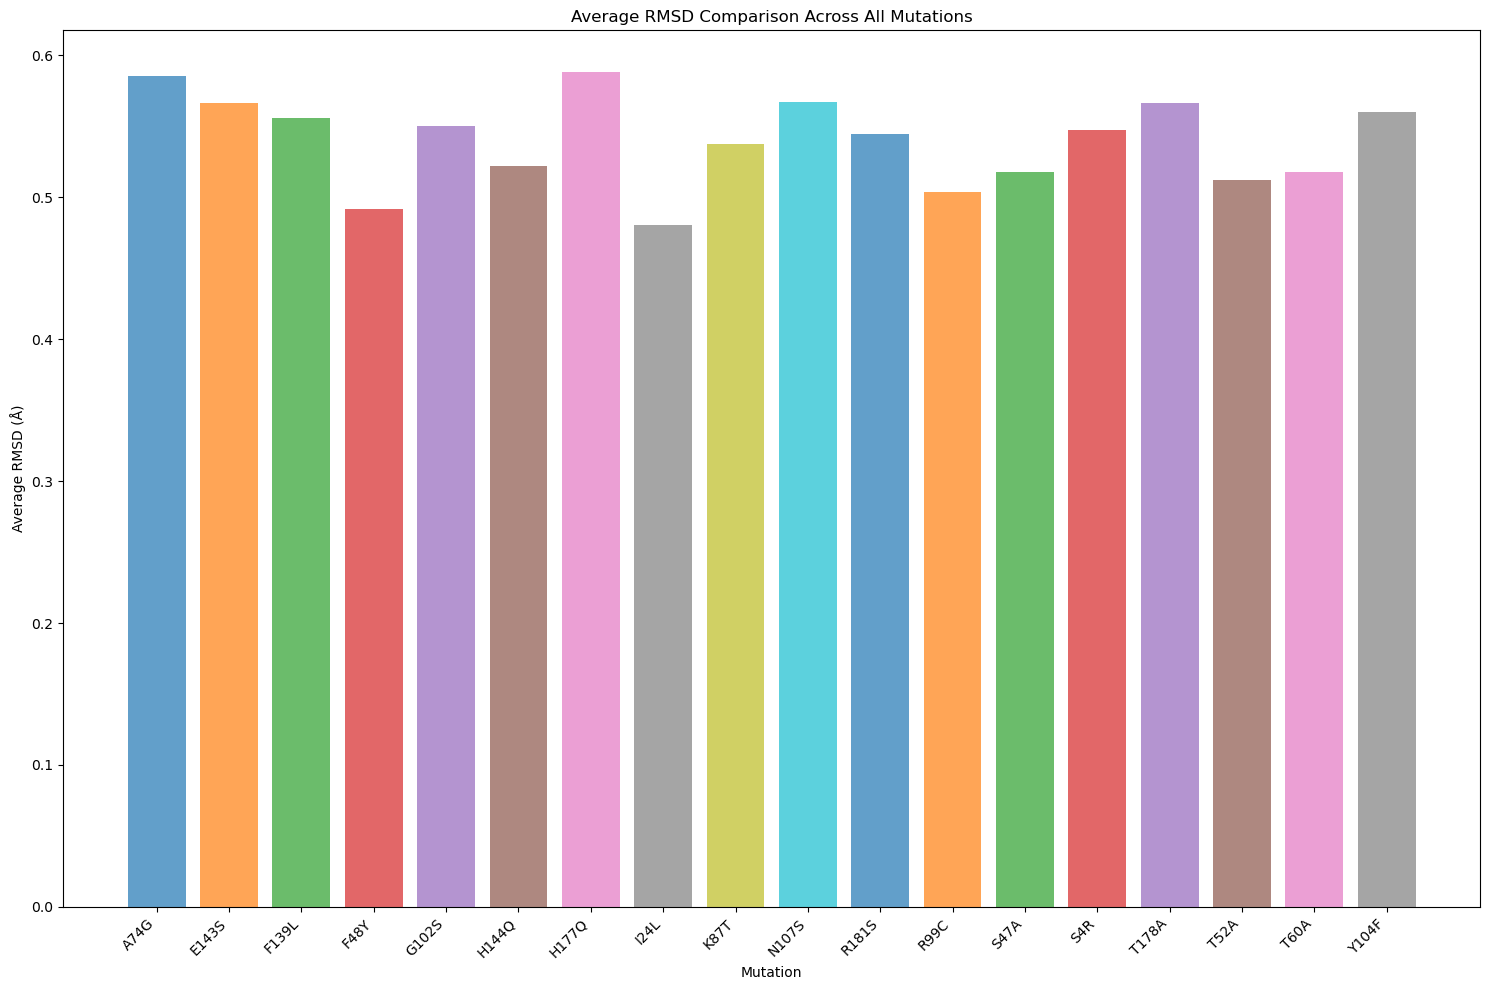

Generating combined RMSF plot


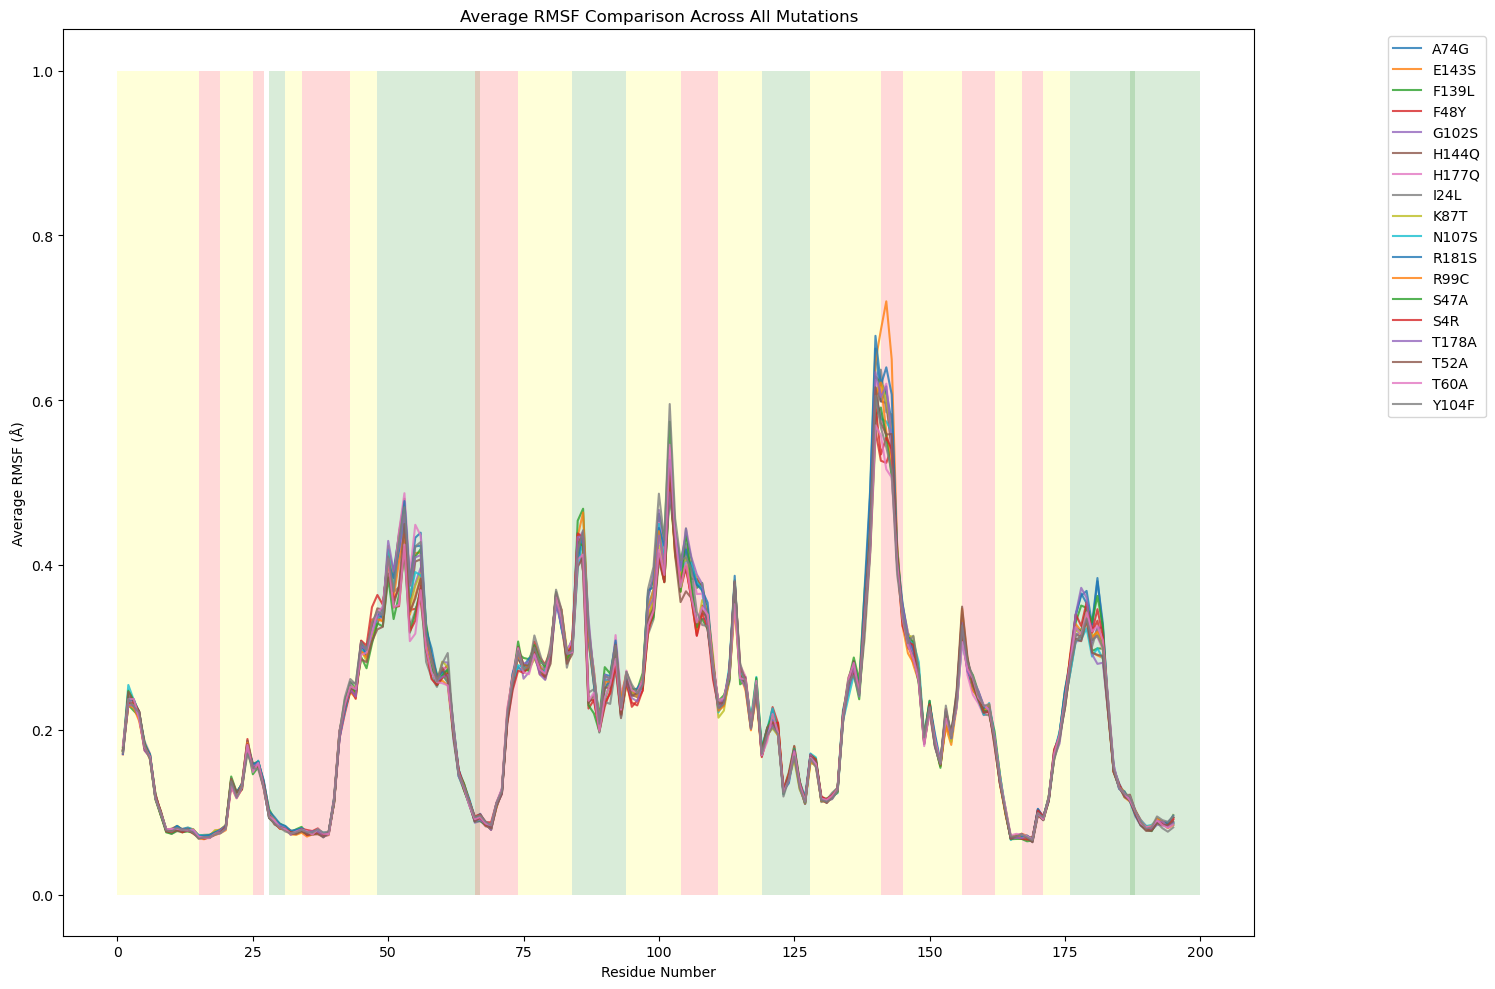

Generating RMSF heat map


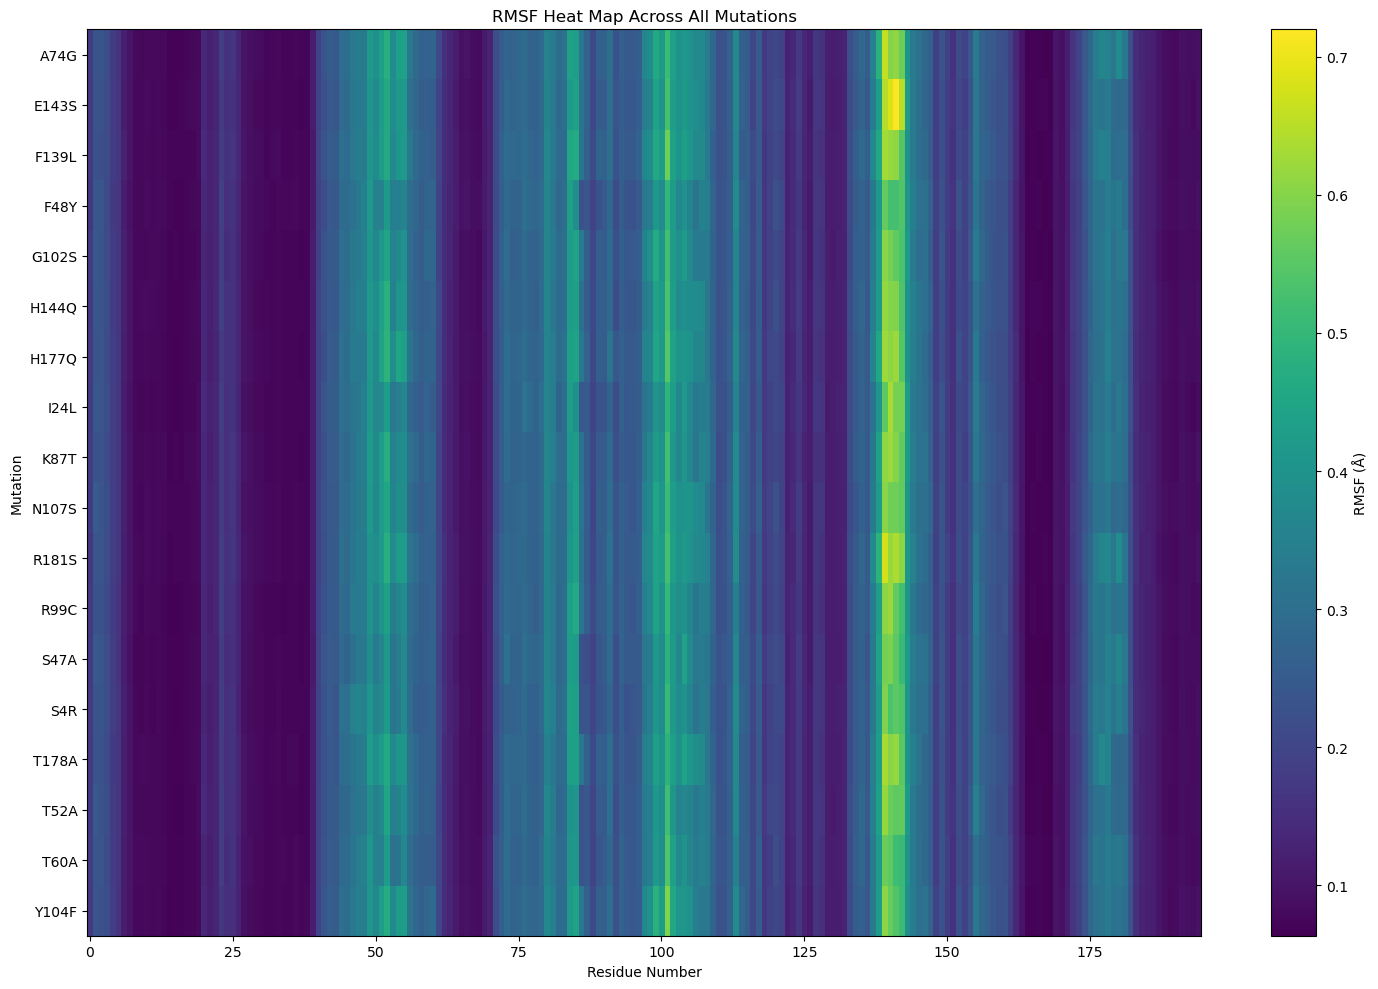

Generating detailed RMSF comparison with mutation sites


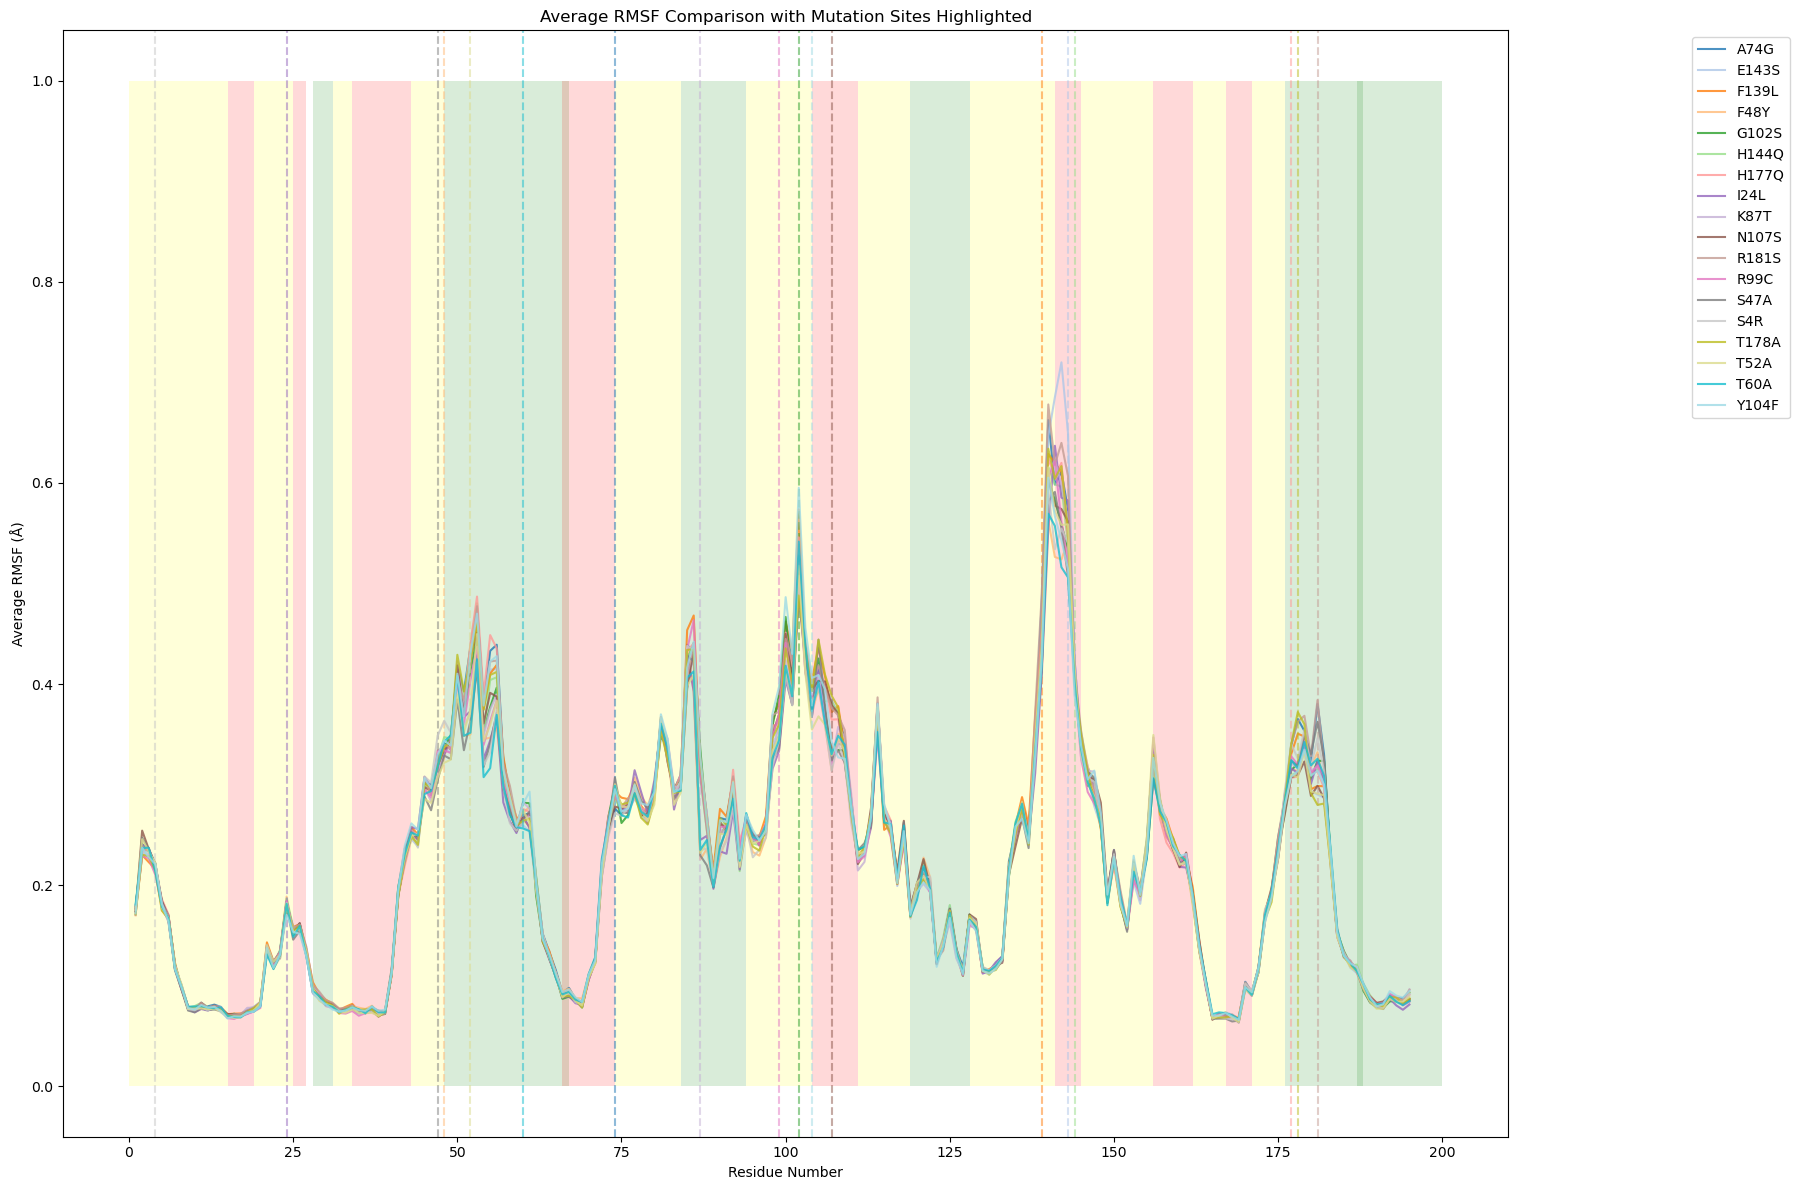

Analysis complete


In [1]:
#!/usr/bin/env python3
import os
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align

# Define base path
base_dir = "/home/hp/results/MOUSE/level2"

# List of all mutation folders
mutation_folders = [
    "A74G", "E143S", "F139L", "F48Y", "G102S", "H144Q", "H177Q", 
    "I24L", "K87T", "N107S", "P142S", "R181S", "R99C", "S47A", 
    "S4R", "T178A", "T52A", "T60A", "Y104F"
]

# Secondary structure regions
ss_regions = [
    (1, 15, 'yellow', "Coil"),
    (16, 19, 'red', "β-Sheet"),
    (20, 25, 'yellow', ""),
    (26, 27, 'red', ""),
    (29, 31, 'green', "α-Helix"),
    (32, 34, 'yellow', ""),
    (35, 43, 'red', ""),
    (44, 48, 'yellow', ""),
    (49, 64, 'green', ""),
    (65, 67, 'green', ""),
    (67, 74, 'red', ""),
    (75, 84, 'yellow', ""),
    (85, 94, 'green', ""),
    (95, 104, 'yellow', ""),
    (105, 111, 'red', ""),
    (112, 119, 'yellow', ""),
    (120, 128, 'green', ""),
    (129, 141, 'yellow', ""),
    (142, 145, 'red', ""),
    (146, 156, 'yellow', ""),
    (157, 162, 'red', ""),
    (163, 167, 'yellow', ""),
    (168, 171, 'red', ""),
    (172, 176, 'yellow', ""),
    (177, 188, 'green', ""),
    (188, 200, 'green', ""),
]

# Function to add secondary structure background to plots
def add_ss_background(ax):
    y_min, y_max = ax.get_ylim()
    height = y_max - y_min
    
    # Map structure types to legend handles
    legend_elements = []
    added_labels = set()
    
    for start, end, color, label in ss_regions:
        # Add colored background for each region
        ax.add_patch(plt.Rectangle((start-1, y_min), end-start+1, height, 
                                  facecolor=color, alpha=0.15, edgecolor='none'))
        
        # Add to legend if this type hasn't been added yet
        if label and label not in added_labels:
            legend_elements.append(plt.Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.3, label=label))
            added_labels.add(label)
    
    return legend_elements

# Dictionaries to store data for all mutations and trajectories
mutation_rmsd_data = {}
mutation_rmsf_data = {}

# Process each mutation folder
for mutation in mutation_folders:
    print(f"Processing mutation: {mutation}")
    mutation_dir = os.path.join(base_dir, mutation)
    
    if not os.path.exists(mutation_dir):
        print(f"Warning: Directory {mutation_dir} does not exist. Skipping.")
        continue
    
    # Get the specific minim.pdb for this mutation
    pdb_file = os.path.join(mutation_dir, "minim", "minim.pdb")
    
    if not os.path.exists(pdb_file):
        print(f"Warning: PDB file {pdb_file} does not exist. Skipping {mutation}.")
        continue
    
    # Load reference structure for this mutation
    print(f"  Loading reference structure from {pdb_file}")
    try:
        ref = mda.Universe(pdb_file)
    except Exception as e:
        print(f"  Error loading reference structure: {str(e)}")
        continue
    
    # Lists to store data for all trajectories of this mutation
    all_rmsd_data = []
    all_rmsf_data = []
    traj_labels = []
    
    # Process each trajectory for this mutation
    for traj_num in range(16):  # traj00 to traj15
        traj_dir = os.path.join(mutation_dir, f"traj{traj_num:02d}")
        dcd_file = os.path.join(traj_dir, "fep_000_1.000.dcd")
        
        # Check if file exists before processing
        if os.path.exists(dcd_file):
            print(f"  Processing {dcd_file}")
            traj_label = f"{mutation}-traj{traj_num:02d}"
            
            try:
                # Load trajectory with the specific PDB file for this mutation
                u = mda.Universe(pdb_file, dcd_file)
                
                # Calculate RMSD
                print(f"  Calculating RMSD")
                
                # Select backbone atoms
                mobile = u.select_atoms('backbone')
                reference = ref.select_atoms('backbone')
                
                # Align trajectory to reference
                print(f"  Aligning trajectory")
                alignment = align.AlignTraj(u, ref, select='backbone', in_memory=True)
                alignment.run()
                
                # Calculate RMSD after alignment
                print(f"  Computing RMSD")
                rmsd_analyzer = rms.RMSD(u, ref, select='backbone', ref_frame=0)
                rmsd_analyzer.run()
                rmsd_data = rmsd_analyzer.results.rmsd[:, 2]  # [:, 2] contains the actual RMSD values
                
                all_rmsd_data.append(rmsd_data)
                traj_labels.append(traj_label)
                
                # Calculate RMSF
                print(f"  Calculating RMSF")
                rmsf_analyzer = rms.RMSF(u.select_atoms('name CA'))
                rmsf_analyzer.run()
                rmsf_data = rmsf_analyzer.results.rmsf
                
                all_rmsf_data.append(rmsf_data)
            except Exception as e:
                print(f"  Error processing {dcd_file}: {str(e)}")
                continue
        else:
            print(f"  Warning: {dcd_file} does not exist. Skipping.")
    
    # Store data for this mutation
    if all_rmsd_data:
        mutation_rmsd_data[mutation] = {
            "data": all_rmsd_data,
            "labels": traj_labels,
            "avg": np.mean(all_rmsd_data, axis=1)  # Average RMSD across frames for each trajectory
        }
        
        # Calculate average RMSF across all trajectories for this mutation
        if all_rmsf_data:
            avg_rmsf = np.mean(all_rmsf_data, axis=0)
            mutation_rmsf_data[mutation] = {
                "data": all_rmsf_data,
                "labels": traj_labels,
                "avg": avg_rmsf
            }

# Generate combined RMSD plot for all mutations
print("Generating combined RMSD plot")
plt.figure(figsize=(15, 10))

for mutation, data in mutation_rmsd_data.items():
    # Plot average RMSD for each mutation
    avg_rmsd = np.mean(data["avg"])
    plt.bar(mutation, avg_rmsd, alpha=0.7)

plt.xlabel('Mutation')
plt.ylabel('Average RMSD (Å)')
plt.title('Average RMSD Comparison Across All Mutations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate combined RMSF plot for all mutations
print("Generating combined RMSF plot")
plt.figure(figsize=(15, 10))
ax = plt.gca()

# Add secondary structure background
ss_legend = add_ss_background(ax)

# Plot average RMSF for each mutation
for mutation, data in mutation_rmsf_data.items():
    plt.plot(range(1, len(data["avg"])+1), data["avg"], label=mutation, alpha=0.8)

plt.xlabel('Residue Number')
plt.ylabel('Average RMSF (Å)')
plt.title('Average RMSF Comparison Across All Mutations')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

# Generate RMSF heat map for all mutations
print("Generating RMSF heat map")
plt.figure(figsize=(15, 10))

# Check if we have RMSF data for all mutations
if mutation_rmsf_data:
    # Find the minimum number of residues across all mutations
    min_residues = min(len(data["avg"]) for data in mutation_rmsf_data.values())
    
    # Prepare data for heatmap
    mutations = list(mutation_rmsf_data.keys())
    heatmap_data = np.zeros((len(mutations), min_residues))
    
    for i, mutation in enumerate(mutations):
        # Use the minimum common number of residues
        heatmap_data[i] = mutation_rmsf_data[mutation]["avg"][:min_residues]
    
    # Plot heatmap
    plt.imshow(heatmap_data, aspect='auto', cmap='viridis')
    plt.colorbar(label='RMSF (Å)')
    plt.xlabel('Residue Number')
    plt.ylabel('Mutation')
    plt.yticks(range(len(mutations)), mutations)
    plt.title('RMSF Heat Map Across All Mutations')
    plt.tight_layout()
    plt.show()
else:
    print("No RMSF data available for heatmap")

# Generate detailed RMSF comparison with highlighted mutation sites
print("Generating detailed RMSF comparison with mutation sites")
plt.figure(figsize=(18, 12))
ax = plt.gca()

# Add secondary structure background
ss_legend = add_ss_background(ax)

# Highlight each mutation site with a vertical line
mutation_positions = {
    "A74G": 74, "E143S": 143, "F139L": 139, "F48Y": 48, "G102S": 102, 
    "H144Q": 144, "H177Q": 177, "I24L": 24, "K87T": 87, "N107S": 107, 
    "P142S": 142, "R181S": 181, "R99C": 99, "S47A": 47, "S4R": 4, 
    "T178A": 178, "T52A": 52, "T60A": 60, "Y104F": 104
}

# Plot average RMSF for each mutation
if mutation_rmsf_data:
    colors = plt.cm.tab20(np.linspace(0, 1, len(mutation_rmsf_data)))
    for i, (mutation, data) in enumerate(mutation_rmsf_data.items()):
        color = colors[i]
        plt.plot(range(1, len(data["avg"])+1), data["avg"], label=mutation, color=color, alpha=0.8)
        
        # Highlight mutation site if known
        if mutation in mutation_positions:
            pos = mutation_positions[mutation]
            plt.axvline(x=pos, color=color, linestyle='--', alpha=0.5)
    
    plt.xlabel('Residue Number')
    plt.ylabel('Average RMSF (Å)')
    plt.title('Average RMSF Comparison with Mutation Sites Highlighted')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.show()
else:
    print("No RMSF data available for comparison plot")

print("Analysis complete")

Processing mutation: A74G
  Loading reference structure from /home/hp/results/MOUSE/level2/A74G/minim/minim.pdb


/home/hp/miniconda3/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


  Processing /home/hp/results/MOUSE/level2/A74G/traj00/fep_050_0.000.dcd


/home/hp/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj01/fep_050_0.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj02/fep_050_0.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj03/fep_050_0.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj04/fep_050_0.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj05/fep_050_0.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/results/MOUSE/level2/A74G/traj06/fep_050_0.000.dcd
  Calculating RMSD
  Aligning trajectory
  Computing RMSD
  Calculating RMSF
  Processing /home/hp/r

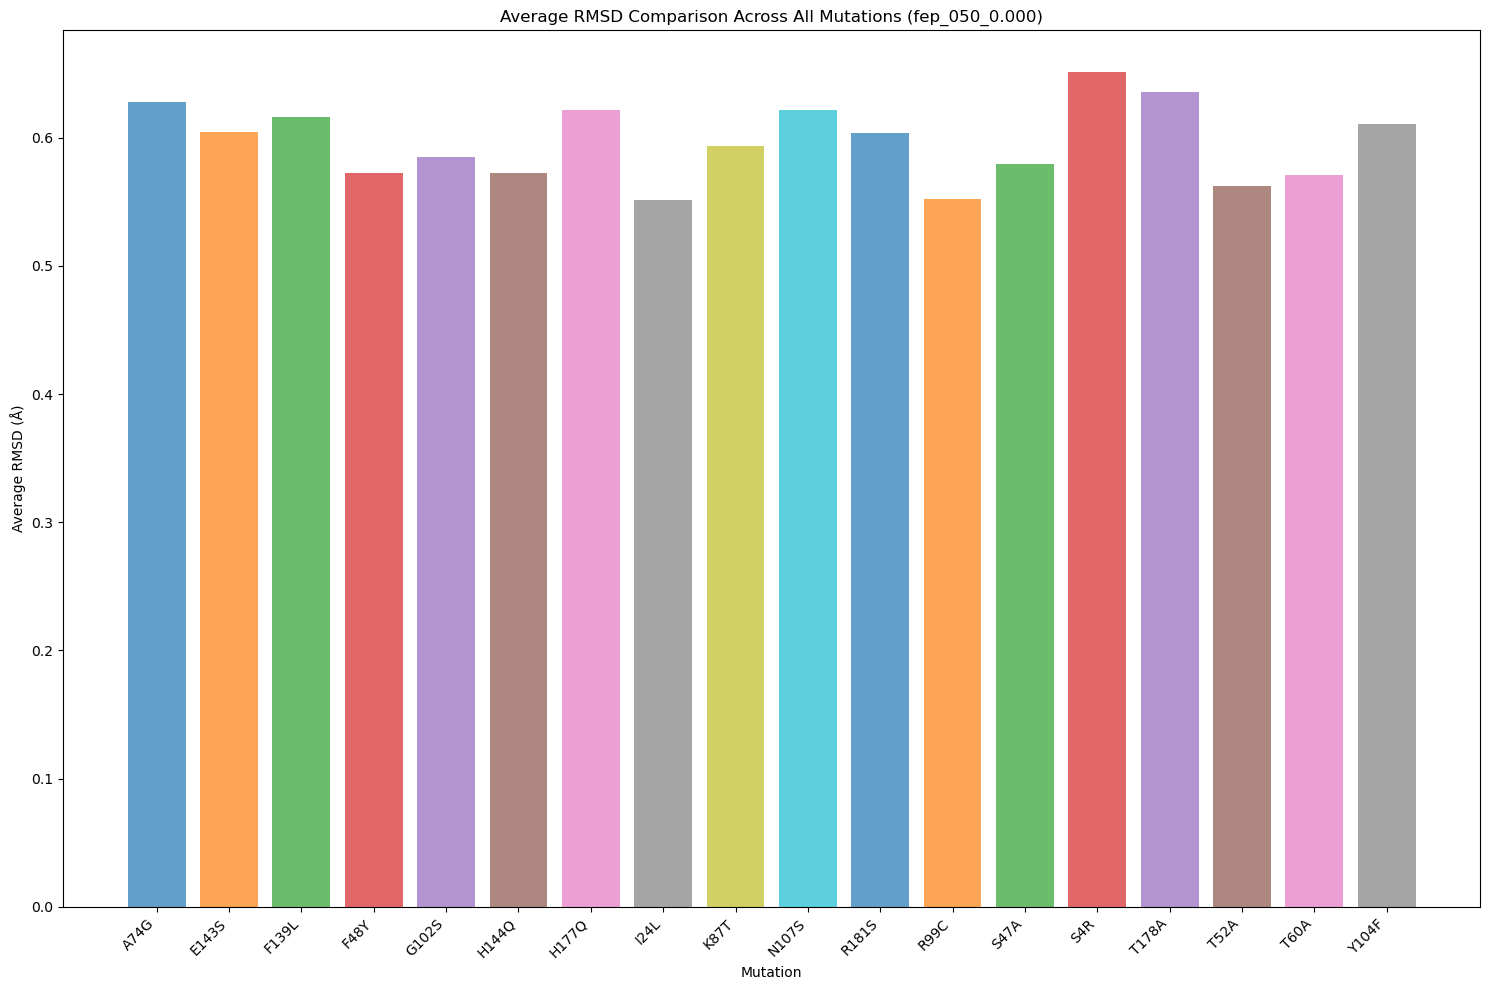

Generating combined RMSF plot


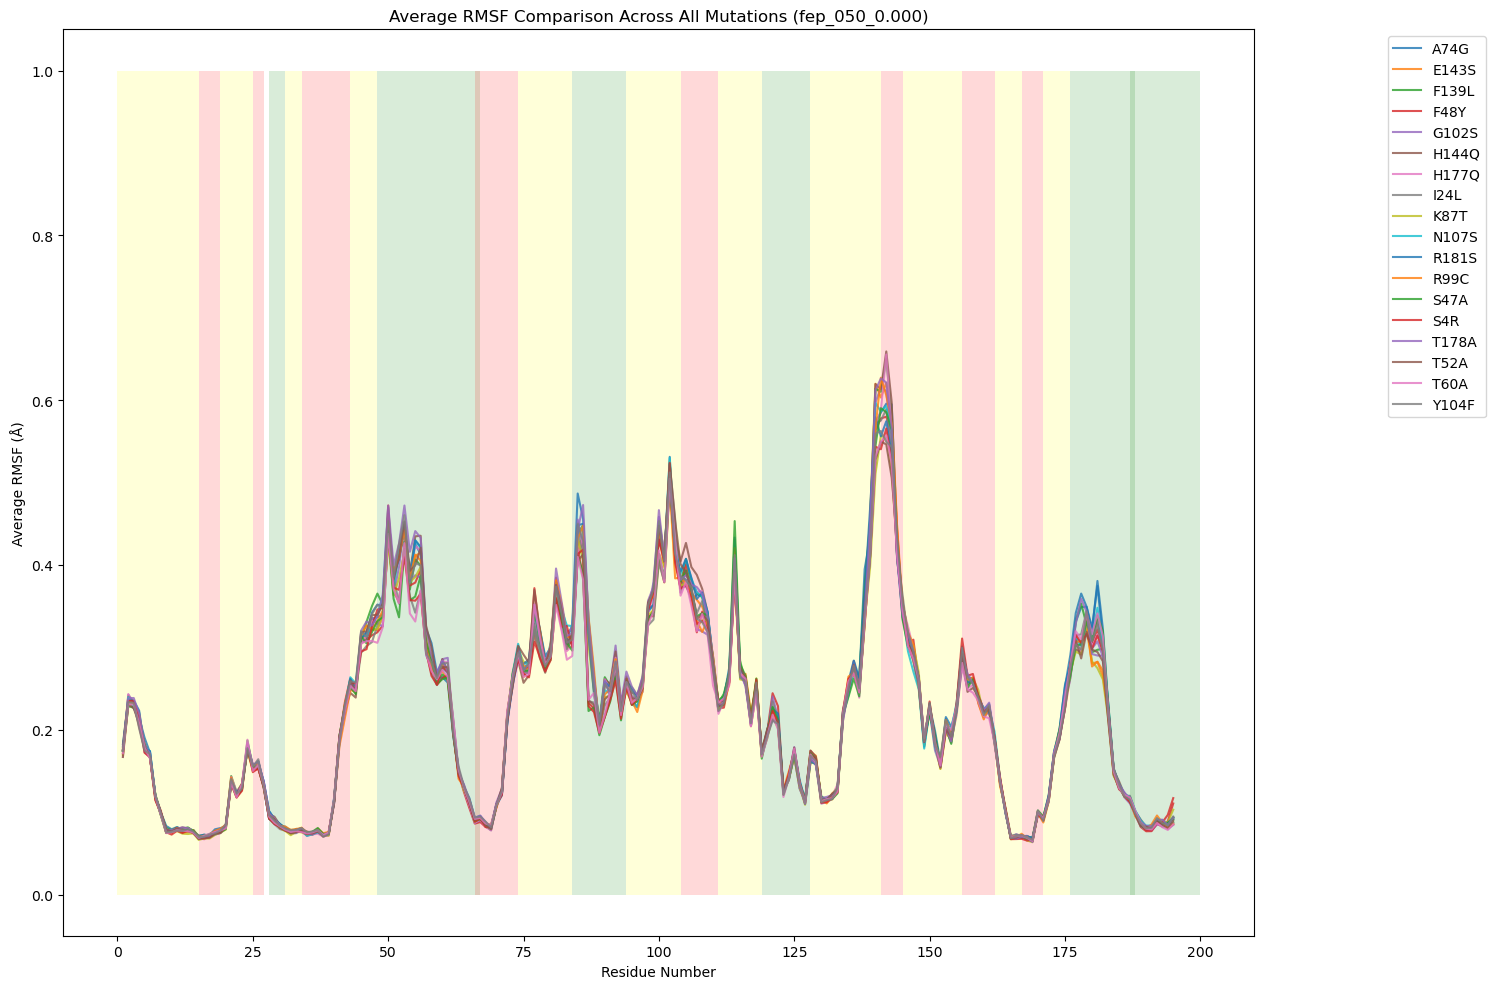

Generating RMSF heat map


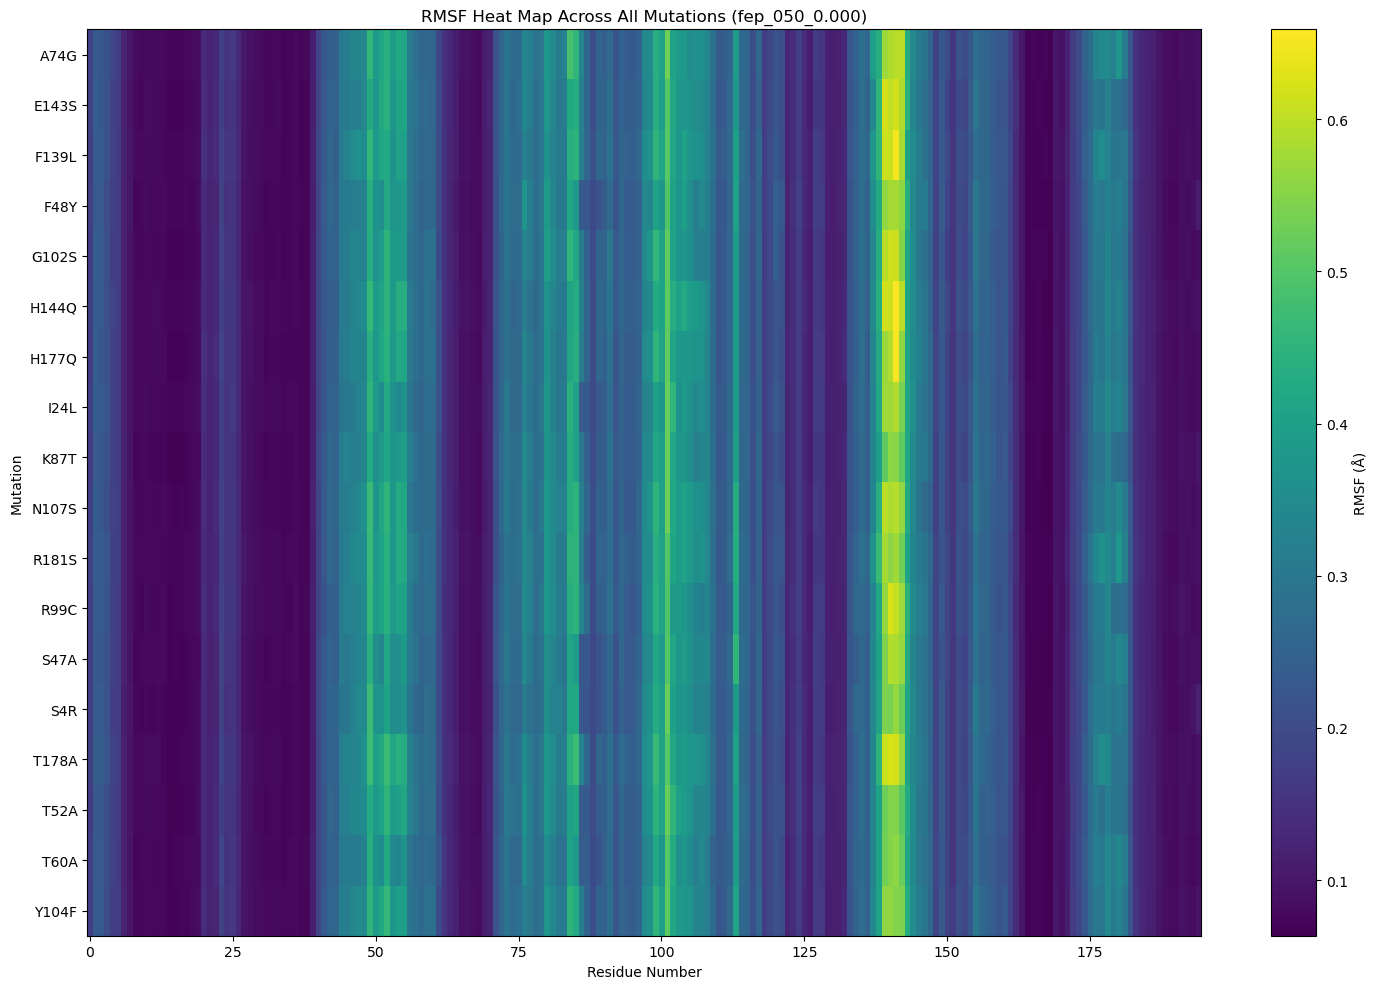

Generating detailed RMSF comparison with mutation sites


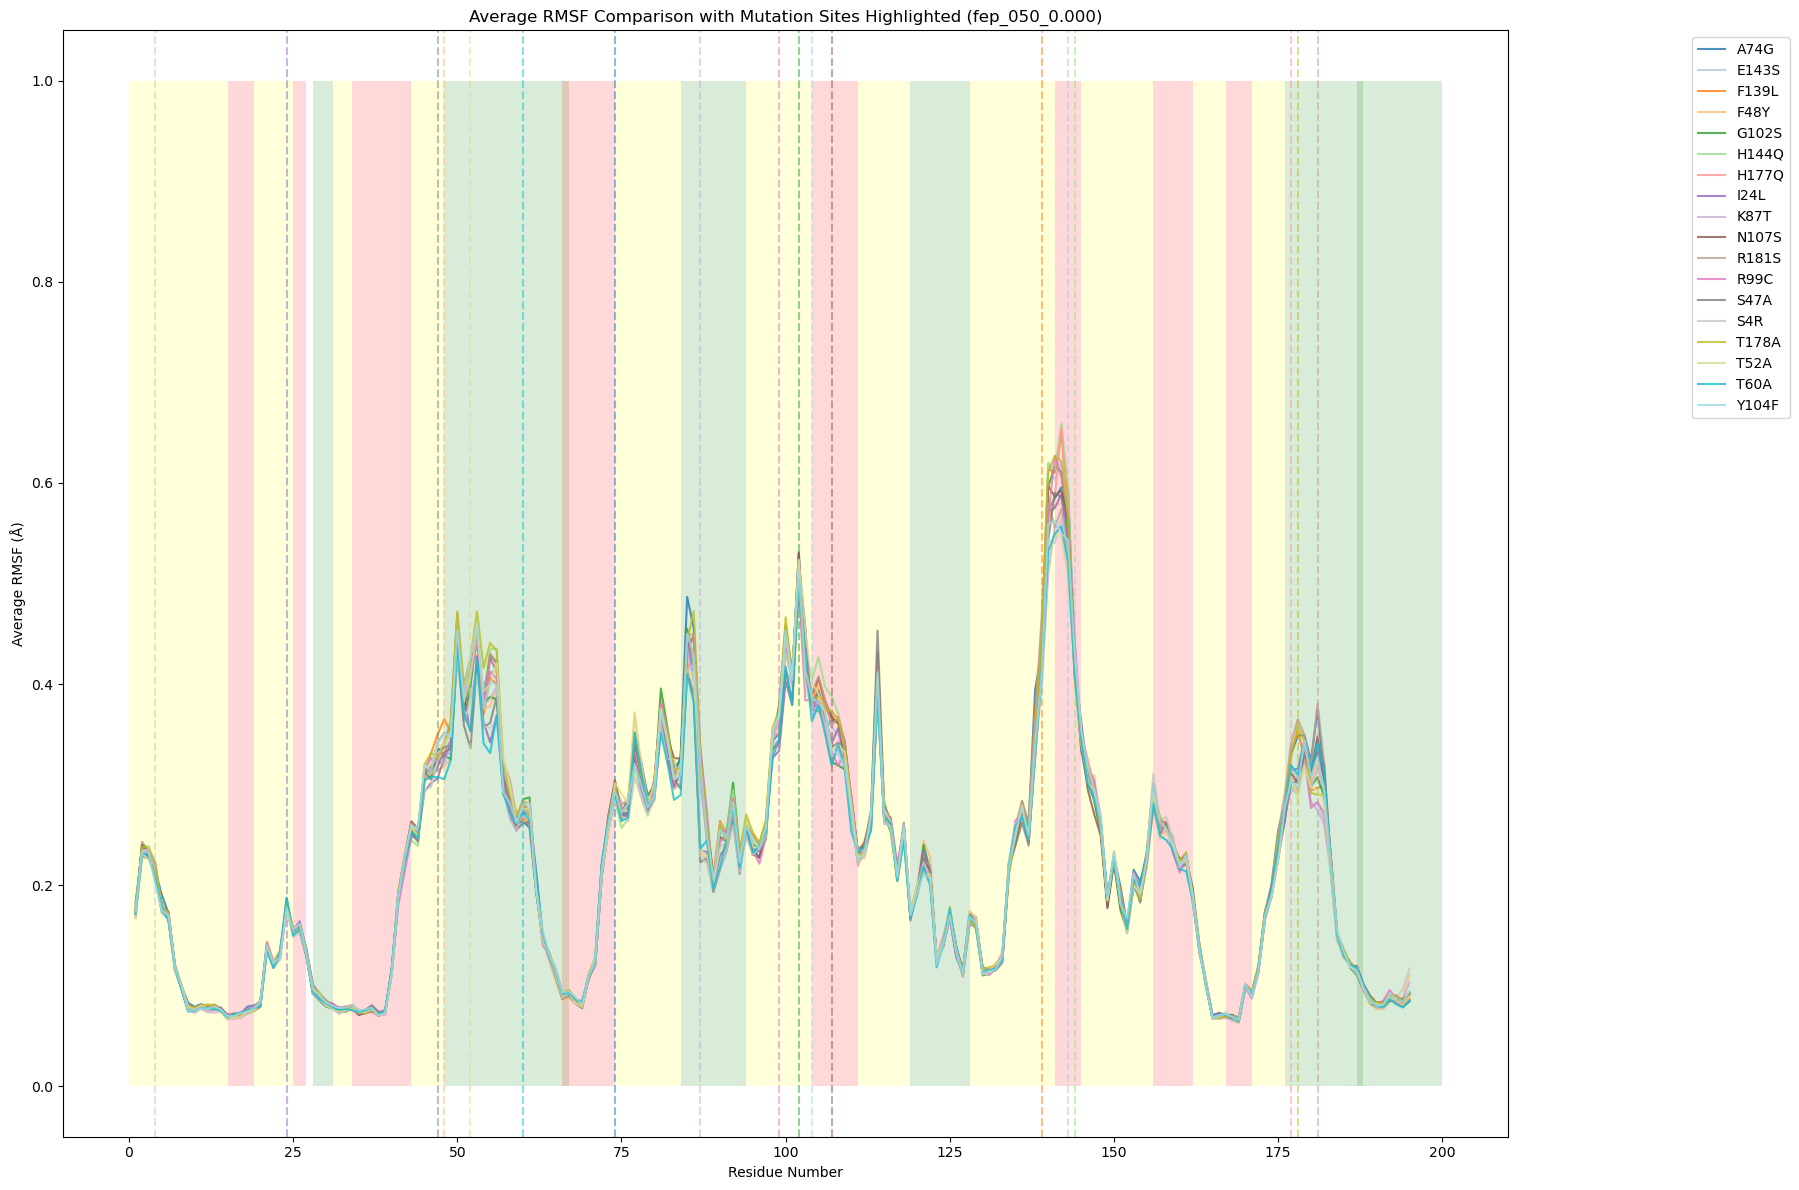

Analysis complete


In [2]:
#!/usr/bin/env python3
import os
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align

# Define base path
base_dir = "/home/hp/results/MOUSE/level2"

# List of all mutation folders
mutation_folders = [
    "A74G", "E143S", "F139L", "F48Y", "G102S", "H144Q", "H177Q", 
    "I24L", "K87T", "N107S", "P142S", "R181S", "R99C", "S47A", 
    "S4R", "T178A", "T52A", "T60A", "Y104F"
]

# Secondary structure regions
ss_regions = [
    (1, 15, 'yellow', "Coil"),
    (16, 19, 'red', "β-Sheet"),
    (20, 25, 'yellow', ""),
    (26, 27, 'red', ""),
    (29, 31, 'green', "α-Helix"),
    (32, 34, 'yellow', ""),
    (35, 43, 'red', ""),
    (44, 48, 'yellow', ""),
    (49, 64, 'green', ""),
    (65, 67, 'green', ""),
    (67, 74, 'red', ""),
    (75, 84, 'yellow', ""),
    (85, 94, 'green', ""),
    (95, 104, 'yellow', ""),
    (105, 111, 'red', ""),
    (112, 119, 'yellow', ""),
    (120, 128, 'green', ""),
    (129, 141, 'yellow', ""),
    (142, 145, 'red', ""),
    (146, 156, 'yellow', ""),
    (157, 162, 'red', ""),
    (163, 167, 'yellow', ""),
    (168, 171, 'red', ""),
    (172, 176, 'yellow', ""),
    (177, 188, 'green', ""),
    (188, 200, 'green', ""),
]

# Function to add secondary structure background to plots
def add_ss_background(ax):
    y_min, y_max = ax.get_ylim()
    height = y_max - y_min
    
    # Map structure types to legend handles
    legend_elements = []
    added_labels = set()
    
    for start, end, color, label in ss_regions:
        # Add colored background for each region
        ax.add_patch(plt.Rectangle((start-1, y_min), end-start+1, height, 
                                  facecolor=color, alpha=0.15, edgecolor='none'))
        
        # Add to legend if this type hasn't been added yet
        if label and label not in added_labels:
            legend_elements.append(plt.Rectangle((0, 0), 1, 1, facecolor=color, alpha=0.3, label=label))
            added_labels.add(label)
    
    return legend_elements

# Dictionaries to store data for all mutations and trajectories
mutation_rmsd_data = {}
mutation_rmsf_data = {}

# Process each mutation folder
for mutation in mutation_folders:
    print(f"Processing mutation: {mutation}")
    mutation_dir = os.path.join(base_dir, mutation)
    
    if not os.path.exists(mutation_dir):
        print(f"Warning: Directory {mutation_dir} does not exist. Skipping.")
        continue
    
    # Get the specific minim.pdb for this mutation
    pdb_file = os.path.join(mutation_dir, "minim", "minim.pdb")
    
    if not os.path.exists(pdb_file):
        print(f"Warning: PDB file {pdb_file} does not exist. Skipping {mutation}.")
        continue
    
    # Load reference structure for this mutation
    print(f"  Loading reference structure from {pdb_file}")
    try:
        ref = mda.Universe(pdb_file)
    except Exception as e:
        print(f"  Error loading reference structure: {str(e)}")
        continue
    
    # Lists to store data for all trajectories of this mutation
    all_rmsd_data = []
    all_rmsf_data = []
    traj_labels = []
    
    # Process each trajectory for this mutation
    for traj_num in range(16):  # traj00 to traj15
        traj_dir = os.path.join(mutation_dir, f"traj{traj_num:02d}")
        # Changed filename from fep_000_1.000.dcd to fep_050_0.000.dcd
        dcd_file = os.path.join(traj_dir, "fep_050_0.000.dcd")
        
        # Check if file exists before processing
        if os.path.exists(dcd_file):
            print(f"  Processing {dcd_file}")
            traj_label = f"{mutation}-traj{traj_num:02d}"
            
            try:
                # Load trajectory with the specific PDB file for this mutation
                u = mda.Universe(pdb_file, dcd_file)
                
                # Calculate RMSD
                print(f"  Calculating RMSD")
                
                # Select backbone atoms
                mobile = u.select_atoms('backbone')
                reference = ref.select_atoms('backbone')
                
                # Align trajectory to reference
                print(f"  Aligning trajectory")
                alignment = align.AlignTraj(u, ref, select='backbone', in_memory=True)
                alignment.run()
                
                # Calculate RMSD after alignment
                print(f"  Computing RMSD")
                rmsd_analyzer = rms.RMSD(u, ref, select='backbone', ref_frame=0)
                rmsd_analyzer.run()
                rmsd_data = rmsd_analyzer.results.rmsd[:, 2]  # [:, 2] contains the actual RMSD values
                
                all_rmsd_data.append(rmsd_data)
                traj_labels.append(traj_label)
                
                # Calculate RMSF
                print(f"  Calculating RMSF")
                rmsf_analyzer = rms.RMSF(u.select_atoms('name CA'))
                rmsf_analyzer.run()
                rmsf_data = rmsf_analyzer.results.rmsf
                
                all_rmsf_data.append(rmsf_data)
            except Exception as e:
                print(f"  Error processing {dcd_file}: {str(e)}")
                continue
        else:
            print(f"  Warning: {dcd_file} does not exist. Skipping.")
    
    # Store data for this mutation
    if all_rmsd_data:
        mutation_rmsd_data[mutation] = {
            "data": all_rmsd_data,
            "labels": traj_labels,
            "avg": np.mean(all_rmsd_data, axis=1)  # Average RMSD across frames for each trajectory
        }
        
        # Calculate average RMSF across all trajectories for this mutation
        if all_rmsf_data:
            avg_rmsf = np.mean(all_rmsf_data, axis=0)
            mutation_rmsf_data[mutation] = {
                "data": all_rmsf_data,
                "labels": traj_labels,
                "avg": avg_rmsf
            }

# Generate combined RMSD plot for all mutations
print("Generating combined RMSD plot")
plt.figure(figsize=(15, 10))

for mutation, data in mutation_rmsd_data.items():
    # Plot average RMSD for each mutation
    avg_rmsd = np.mean(data["avg"])
    plt.bar(mutation, avg_rmsd, alpha=0.7)

plt.xlabel('Mutation')
plt.ylabel('Average RMSD (Å)')
plt.title('Average RMSD Comparison Across All Mutations (fep_050_0.000)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate combined RMSF plot for all mutations
print("Generating combined RMSF plot")
plt.figure(figsize=(15, 10))
ax = plt.gca()

# Add secondary structure background
ss_legend = add_ss_background(ax)

# Plot average RMSF for each mutation
for mutation, data in mutation_rmsf_data.items():
    plt.plot(range(1, len(data["avg"])+1), data["avg"], label=mutation, alpha=0.8)

plt.xlabel('Residue Number')
plt.ylabel('Average RMSF (Å)')
plt.title('Average RMSF Comparison Across All Mutations (fep_050_0.000)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

# Generate RMSF heat map for all mutations
print("Generating RMSF heat map")
plt.figure(figsize=(15, 10))

# Check if we have RMSF data for all mutations
if mutation_rmsf_data:
    # Find the minimum number of residues across all mutations
    min_residues = min(len(data["avg"]) for data in mutation_rmsf_data.values())
    
    # Prepare data for heatmap
    mutations = list(mutation_rmsf_data.keys())
    heatmap_data = np.zeros((len(mutations), min_residues))
    
    for i, mutation in enumerate(mutations):
        # Use the minimum common number of residues
        heatmap_data[i] = mutation_rmsf_data[mutation]["avg"][:min_residues]
    
    # Plot heatmap
    plt.imshow(heatmap_data, aspect='auto', cmap='viridis')
    plt.colorbar(label='RMSF (Å)')
    plt.xlabel('Residue Number')
    plt.ylabel('Mutation')
    plt.yticks(range(len(mutations)), mutations)
    plt.title('RMSF Heat Map Across All Mutations (fep_050_0.000)')
    plt.tight_layout()
    plt.show()
else:
    print("No RMSF data available for heatmap")

# Generate detailed RMSF comparison with highlighted mutation sites
print("Generating detailed RMSF comparison with mutation sites")
plt.figure(figsize=(18, 12))
ax = plt.gca()

# Add secondary structure background
ss_legend = add_ss_background(ax)

# Highlight each mutation site with a vertical line
mutation_positions = {
    "A74G": 74, "E143S": 143, "F139L": 139, "F48Y": 48, "G102S": 102, 
    "H144Q": 144, "H177Q": 177, "I24L": 24, "K87T": 87, "N107S": 107, 
    "P142S": 142, "R181S": 181, "R99C": 99, "S47A": 47, "S4R": 4, 
    "T178A": 178, "T52A": 52, "T60A": 60, "Y104F": 104
}

# Plot average RMSF for each mutation
if mutation_rmsf_data:
    colors = plt.cm.tab20(np.linspace(0, 1, len(mutation_rmsf_data)))
    for i, (mutation, data) in enumerate(mutation_rmsf_data.items()):
        color = colors[i]
        plt.plot(range(1, len(data["avg"])+1), data["avg"], label=mutation, color=color, alpha=0.8)
        
        # Highlight mutation site if known
        if mutation in mutation_positions:
            pos = mutation_positions[mutation]
            plt.axvline(x=pos, color=color, linestyle='--', alpha=0.5)
    
    plt.xlabel('Residue Number')
    plt.ylabel('Average RMSF (Å)')
    plt.title('Average RMSF Comparison with Mutation Sites Highlighted (fep_050_0.000)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.show()
else:
    print("No RMSF data available for comparison plot")

print("Analysis complete")